In [1]:
import json
import random
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt

In [2]:
dataset = 'yago'
query_type = 'star'

In [77]:
with open(f"/home/tim/Datasets/{dataset}/{query_type}/Joined_Queries.json") as f:
    data = json.load(f)

In [78]:
# This hyperparameter denotes the probability of applying a query to the trainset. It very
# sensibly influences the final splits, need to adjustit !
# Default Value: 0.002 (swdf), 0.0005 (yago star)
training_st_prob = 0.002

In [171]:
# Testing with respect to invariance of triple permutation
# Attention ! THis implementation only checks for overlapping Stars !
train_data = []
test_data = []

train_entities = set()
test_entities = set()

random.shuffle(data)

for query in tqdm(data):
    if len(train_data)==0:
        train_data.append(query)
        train_entities.update([a[2] for a in query["triples"] if not "?" in a[2]])
        continue
    if len(train_data) < 0.0005 * (len(data)):
        train_data.append(query)
        train_entities.update([a[2] for a in query["triples"] if not "?" in a[2]]) 
        continue

    # Getting all objects of query:
    entity_list = [a[2] for a in query["triples"] if not "?" in a[2]] 
    if any(entity in train_entities for entity in entity_list):
        if all(entity not in test_entities for entity in entity_list):
            train_entities.update(entity_list)
            train_data.append(query)
    else:
        test_data.append(query)
        test_entities.update(entity_list)





100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91162/91162 [00:00<00:00, 539883.49it/s]


#### Rechecking if there are overlapping entities

In [172]:
for e in tqdm(test_entities):
    if e in train_entities:
        print('Error: Overlapping Entities !')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14706/14706 [00:00<00:00, 1902045.53it/s]


In [173]:
print('Summary of disjoint split: ')
print(f'Number of queries in training set: {len(train_data)}')
print(f'Number of queries in test set: {len(test_data)}')

Summary of disjoint split: 
Number of queries in training set: 46935
Number of queries in test set: 33833


#### Checking distribution of query sizes among sets

In [174]:
ls = []
for t in train_data:
    ls.append(len(t["triples"]))
ls_test = []
for t in test_data:
    ls_test.append(len(t["triples"]))

(array([ 1012.,  1365.,     0.,     0.,     0., 20202.,     0.,     0.,
            0., 24356.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

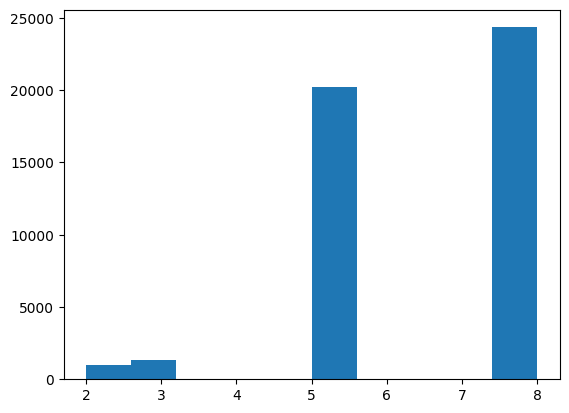

In [175]:
plt.hist(ls)

(array([12211., 20001.,     0.,     0.,     0.,  1309.,     0.,     0.,
            0.,   312.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

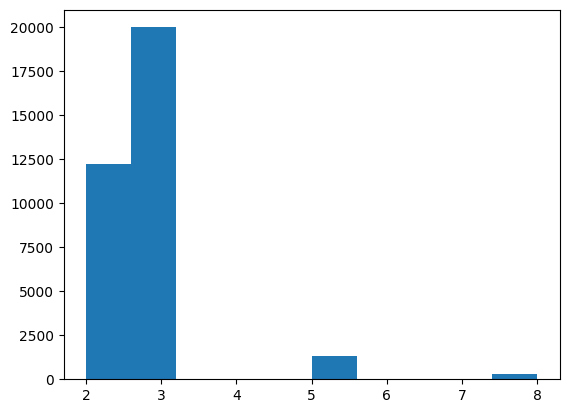

In [176]:
plt.hist(ls_test)

#### If everything looks okay, save the data

In [110]:
with open(f"/home/tim/Datasets/{dataset}/{query_type}/disjoint_train.json", "w") as f:
    json.dump(train_data, f)
with open(f"/home/tim/Datasets/{dataset}/{query_type}/disjoint_test.json", "w") as f:
    json.dump(test_data, f)